Step 1: Load and Explore the Datasets
First, we’ll load both datasets and explore their structure.



In [50]:
import pandas as pd

# Load the dataset
repeated_data = pd.read_csv("aids_dataset.csv")
survival_data= pd.read_csv("survival_dataset.csv")

# Display the first few rows
print("First few rows of the dataset:")
print(repeated_data.head())

print("First few rows of the dataset:")
print(survival_data.head())

First few rows of the dataset:
   Unnamed: 0  patient   Time  death        CD4  obstime drug gender  prevOI  \
0           1        1  16.97      0  10.677078        0  ddC   male    AIDS   
1           2        1  16.97      0   8.426150        6  ddC   male    AIDS   
2           3        1  16.97      0   9.433981       12  ddC   male    AIDS   
3           4        2  19.00      0   6.324555        0  ddI   male  noAIDS   
4           5        2  19.00      0   8.124038        6  ddI   male  noAIDS   

           AZT  start   stop  event  
0  intolerance      0   6.00      0  
1  intolerance      6  12.00      0  
2  intolerance     12  16.97      0  
3  intolerance      0   6.00      0  
4  intolerance      6  12.00      0  
First few rows of the dataset:
   Unnamed: 0  patient   Time  death        CD4  obstime drug  gender  prevOI  \
0           1        1  16.97      0  10.677078        0  ddC    male    AIDS   
1           2        2  19.00      0   6.324555        0  ddI    ma

In [51]:
# Check for missing values
print("\nMissing Values in Repeated Measures Dataset:")
print(repeated_data.isnull().sum())

print("\nMissing Values in Time-to-Event Dataset:")
print(survival_data.isnull().sum())



Missing Values in Repeated Measures Dataset:
Unnamed: 0    0
patient       0
Time          0
death         0
CD4           0
obstime       0
drug          0
gender        0
prevOI        0
AZT           0
start         0
stop          0
event         0
dtype: int64

Missing Values in Time-to-Event Dataset:
Unnamed: 0    0
patient       0
Time          0
death         0
CD4           0
obstime       0
drug          0
gender        0
prevOI        0
AZT           0
start         0
stop          0
event         0
dtype: int64


Step 2: Handle Irregularities in Repeated Measures
1. Sort and Group Data
Group the repeated measures dataset by patient and sort by observation time (obstime).


In [52]:
# Sort by patient and obstime
repeated_data = repeated_data.sort_values(by=["patient", "obstime"])

# Check for irregularities
print("\nObservation Counts Per Patient:")
print(repeated_data["patient"].value_counts())




Observation Counts Per Patient:
patient
139    5
137    5
209    5
91     5
92     5
      ..
181    1
164    1
156    1
403    1
108    1
Name: count, Length: 467, dtype: int64


2. Compute Time Differences (Δt)
Calculate the time intervals between observations (Δt) for each patient.

In [53]:
# Compute time differences for each patient
repeated_data["time_diff"] = repeated_data.groupby("patient")["obstime"].diff().fillna(0)

# Preview the data
print("\nRepeated Measures with Time Differences (Δt):")
print(repeated_data.head())

    


Repeated Measures with Time Differences (Δt):
   Unnamed: 0  patient   Time  death        CD4  obstime drug gender  prevOI  \
0           1        1  16.97      0  10.677078        0  ddC   male    AIDS   
1           2        1  16.97      0   8.426150        6  ddC   male    AIDS   
2           3        1  16.97      0   9.433981       12  ddC   male    AIDS   
3           4        2  19.00      0   6.324555        0  ddI   male  noAIDS   
4           5        2  19.00      0   8.124038        6  ddI   male  noAIDS   

           AZT  start   stop  event  time_diff  
0  intolerance      0   6.00      0        0.0  
1  intolerance      6  12.00      0        6.0  
2  intolerance     12  16.97      0        6.0  
3  intolerance      0   6.00      0        0.0  
4  intolerance      6  12.00      0        6.0  


Step 3: Normalize Repeated Measures
Normalize the time-varying features (CD4, obstime, time_diff) using standardization.

In [10]:
from sklearn.preprocessing import StandardScaler

# Select features to normalize
features_to_normalize = ["CD4", "obstime", "time_diff"]
scaler = StandardScaler()

# Apply normalization
repeated_data[features_to_normalize] = scaler.fit_transform(repeated_data[features_to_normalize])

print("\nNormalized Repeated Measures:")
print(repeated_data.head())



Normalized Repeated Measures:
   Unnamed: 0  patient   Time  death       CD4   obstime drug gender  prevOI  \
0           1        1  16.97      0  0.737225 -0.893455  ddC   male    AIDS   
1           2        1  16.97      0  0.283101  0.378813  ddC   male    AIDS   
2           3        1  16.97      0  0.486431  1.651081  ddC   male    AIDS   
3           4        2  19.00      0 -0.140895 -0.893455  ddI   male  noAIDS   
4           5        2  19.00      0  0.222150  0.378813  ddI   male  noAIDS   

           AZT  start   stop  event  time_diff  
0  intolerance      0   6.00      0  -1.065791  
1  intolerance      6  12.00      0   1.341663  
2  intolerance     12  16.97      0   1.341663  
3  intolerance      0   6.00      0  -1.065791  
4  intolerance      6  12.00      0   1.341663  


Step 4: Align Static Features from Survival Data
Merge the static features (gender, drug) from the survival dataset with the repeated measures dataset.

Prepare Static Features:
Extract and preprocess gender and drug (e.g., one-hot encoding).

In [54]:
# One-hot encode static features
static_features = pd.get_dummies(survival_data[["gender", "drug"]], drop_first=True)

# Add patient IDs to static features for merging
static_features["patient"] = survival_data["patient"]


Merge Static Features with Repeated Measures:
Align static features with the repeated measures dataset.


In [55]:
# Merge static features into repeated measures dataset
repeated_data = repeated_data.merge(static_features, on="patient", how="left")

print("\nRepeated Measures with Static Features:")
print(repeated_data.head())



Repeated Measures with Static Features:
   Unnamed: 0  patient   Time  death        CD4  obstime drug gender  prevOI  \
0           1        1  16.97      0  10.677078        0  ddC   male    AIDS   
1           2        1  16.97      0   8.426150        6  ddC   male    AIDS   
2           3        1  16.97      0   9.433981       12  ddC   male    AIDS   
3           4        2  19.00      0   6.324555        0  ddI   male  noAIDS   
4           5        2  19.00      0   8.124038        6  ddI   male  noAIDS   

           AZT  start   stop  event  time_diff  gender_male  drug_ddI  
0  intolerance      0   6.00      0        0.0         True     False  
1  intolerance      6  12.00      0        6.0         True     False  
2  intolerance     12  16.97      0        6.0         True     False  
3  intolerance      0   6.00      0        0.0         True      True  
4  intolerance      6  12.00      0        6.0         True      True  


Step 5: Prepare Survival Labels
Extract survival labels (Time, death) for each patient

In [56]:
# Extract survival labels
survival_labels = survival_data[["patient", "Time", "death"]]

# Merge survival labels with repeated measures
repeated_data = repeated_data.merge(survival_labels, on="patient", how="left")

print("\nRepeated Measures with Survival Labels:")
print(repeated_data.head())



Repeated Measures with Survival Labels:
   Unnamed: 0  patient  Time_x  death_x        CD4  obstime drug gender  \
0           1        1   16.97        0  10.677078        0  ddC   male   
1           2        1   16.97        0   8.426150        6  ddC   male   
2           3        1   16.97        0   9.433981       12  ddC   male   
3           4        2   19.00        0   6.324555        0  ddI   male   
4           5        2   19.00        0   8.124038        6  ddI   male   

   prevOI          AZT  start   stop  event  time_diff  gender_male  drug_ddI  \
0    AIDS  intolerance      0   6.00      0        0.0         True     False   
1    AIDS  intolerance      6  12.00      0        6.0         True     False   
2    AIDS  intolerance     12  16.97      0        6.0         True     False   
3  noAIDS  intolerance      0   6.00      0        0.0         True      True   
4  noAIDS  intolerance      6  12.00      0        6.0         True      True   

   Time_y  death_y  


Step 6: Create Sequential and Static Inputs
Group the data by patient to form the sequential inputs and extract the static features and labels.

Group Sequential Features:
Form sequences of CD4, obstime, and time_diff.


In [57]:
# Group sequential features by patient
sequential_features = repeated_data.groupby("patient")[["CD4", "obstime", "time_diff"]].apply(lambda x: x.values).tolist()


Extract Static Features:
Extract unique static features for each patient


In [15]:
# Extract static features for each patient
static_features = survival_data[["gender", "drug"]]
static_features = pd.get_dummies(static_features, drop_first=True).values


Extract Labels:
Use Time and death as the labels.

In [16]:
# Extract survival labels
labels = survival_data[["Time", "death"]].values


Step 7: Handle Padding for Sequential Inputs
Since patients have varying numbers of observations, pad sequences to align them.

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequential features
padded_sequential_features = pad_sequences(sequential_features, padding="post", dtype="float32")

print("\nPadded Sequential Features:")
print(padded_sequential_features.shape)  # Should be (num_patients, max_seq_len, num_features)



Padded Sequential Features:
(467, 5, 3)


Final Preprocessed Data:
Sequential Inputs (Time-varying):

Shape: (num_patients, max_seq_len, num_features)
Includes CD4, obstime, and time_diff.
Static Inputs (Baseline Features):

Shape: (num_patients, num_static_features)
Includes one-hot encoded gender and drug.
Labels (Survival Data):

Shape: (num_patients, 2)
Includes Time and death

RNN Model Implementation 


In [58]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout



Step 2: Define the Model Architecture
We will create an RNN model with two inputs:

Sequential Input: For time-varying features (CD4, obstime, time_diff).
Static Input: For baseline features (gender, drug).
The output will be a survival probability (a value between 0 and 1)

In [61]:
# Define input for sequential data
seq_input = Input(shape=(None, 3), name="SeInput")  # 3 time-varying features
lstm_out = LSTM(64, return_sequences=False, name="LSTM")(seq_input)
lstm_out = Dropout(0.3)(lstm_out)

# Define input for static data
static_input = Input(shape=(static_features.shape[1],), name="StatInput")  # Static features

# Combine sequential and static features
combined = Concatenate(name="Concatenate")([lstm_out, static_input])

# Dense layers for survival prediction
dense_1 = Dense(32, activation="relu", name="Dense1")(combined)
dense_1 = Dropout(0.3)(dense_1)  
survival_output = Dense(1, activation="sigmoid", name="SurvivalOutput")(dense_2)

# Define the model
model = Model(inputs=[seq_input, static_input], outputs=survival_output, name="SurvivalRNN")

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "SurvivalRNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ SequentialInput     │ (None, None, 3)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LSTM (LSTM)         │ (None, 64)        │     17,408 │ SequentialInput[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ StaticInput         │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concatenate         │ (None, 66)        │          0 │ LSTM[0][0],       │
│ (Concatenate)       │                   │            │ StaticInput[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense1 (Dense)      │ (None, 32)        │      2,144 │ Concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense2 (Dense)      │ (None, 16)        │        528 │ Dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SeInput             │ (None, None, 3)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ StatInput           │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SurvivalOutput      │ (None, 1)         │         17 │ Dense2[0][0]      │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,097 (78.50 KB)

 Trainable params: 20,097 (78.50 KB)

 Non-trainable params: 0 (0.00 B)

Step 3: Train the Model
Prepare the Data:
Sequential Input: Already padded during preprocessing.
Static Input: Converted to a NumPy array.
Labels: Use the death column as the target variable

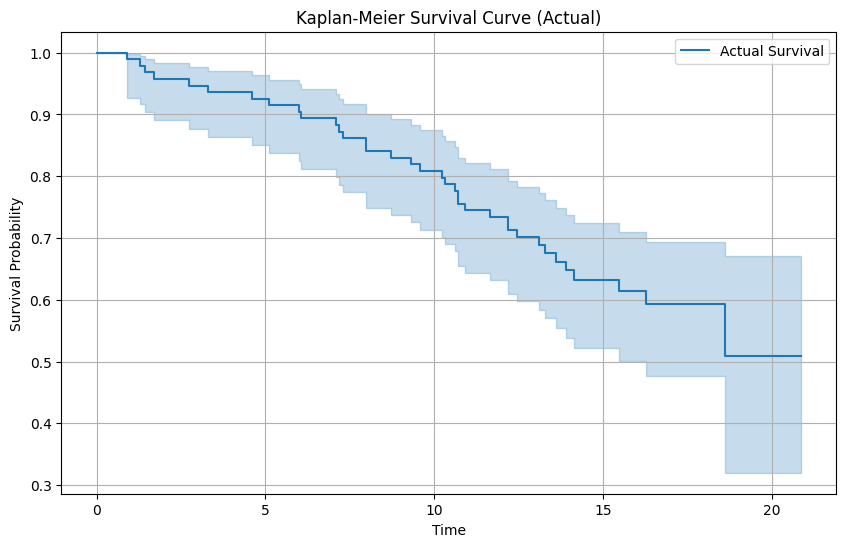

In [75]:
!pip install lifelines
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Kaplan-Meier curve for actual survival
kmf_actual = KaplanMeierFitter()
kmf_actual.fit(test_labels[:, 0], event_observed=test_labels[:, 1], label='Actual Survival')

# Plot actual Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf_actual.plot_survival_function(ci_show=True)
plt.title('Kaplan-Meier Survival Curve (Actual)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)


Step 4: Evaluate the Model
After training, evaluate the model's performance using the validation set or new data.